In [1]:
%load_ext autoreload
%cd /mnt/hdd_2/abdu/gtex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats

/mnt/hdd_2/abdu/gtex


### Adipose Subcutaneous Tissue (GTEx)

In [3]:
import pickle
gene_symbol_ensembl_id = pickle.load(open("/home/abdu/bio_ai/code/biocypher-metta/aux_files/hgnc_to_ensembl.pkl", "rb"))
ensembl_id_gene_symbol = pickle.load(open("/home/abdu/bio_ai/code/biocypher-metta/aux_files/ensembl_to_hgnc.pkl", "rb"))

In [2]:
gene_tpm_count_df = pd.read_table("/mnt/hdd_2/abdu/gtex/gene_tpm_2017-06-05_v8_adipose_subcutaneous.gct", skiprows=2)
gene_tpm_count_df["Name"] = gene_tpm_count_df["Name"].apply(lambda x: x.split(".")[0])
gene_tpm_count_df = gene_tpm_count_df.drop(columns=["Description", "id"])
gene_tpm_count_df = gene_tpm_count_df.set_index("Name")
gene_expr_df = np.log2(gene_tpm_count_df + 1)
print("Number of genes: ", gene_expr_df.shape[0])
gene_expr_df.head()

Number of genes:  56200


,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-9YFMG,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,GTEX-11DXW-0326-SM-5H11W,...,GTEX-ZXES-2026-SM-5NQ6R,GTEX-ZXG5-0226-SM-59HJI,GTEX-ZYFC-0326-SM-5NQ7H,GTEX-ZYFD-0226-SM-5NQ86,GTEX-ZYT6-0326-SM-7LG5R,GTEX-ZYVF-0226-SM-5GIEG,GTEX-ZYW4-0226-SM-5E44M,GTEX-ZYY3-0226-SM-5E45M,GTEX-ZZ64-1626-SM-5E43W,GTEX-ZZPU-2726-SM-5NQ8O
Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044184,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035905
ENSG00000227232,3.287472,2.029276,2.378512,2.070733,2.037734,1.851999,2.353606,2.531818,1.759156,1.973795,...,1.987685,2.733137,3.36247,2.771463,2.248231,1.931305,1.362891,2.434562,2.378789,1.663117
ENSG00000278267,0.000000,0.000000,0.000000,0.668845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000243485,0.100170,0.000000,0.059078,0.000000,0.000000,0.039560,0.000000,0.087055,0.000000,0.000000,...,0.067501,0.000000,0.00000,0.000000,0.059355,0.000000,0.086512,0.071488,0.071900,0.000000
ENSG00000237613,0.000000,0.000000,0.000000,0.000000,0.052694,0.000000,0.000000,0.062398,0.048515,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.067501,0.000000,0.000000,0.000000,0.000000


### White Pre-Adipocytes (CellxGene)

In [2]:
import anndata as ad
white_pre_adipocytes = ad.read_h5ad("/mnt/hdd_2/abdu/gtex/white_preadipocytes_sc_exp.h5ad")
white_pre_adipocytes_df = white_pre_adipocytes.to_df()

/home/abdu/.local/lib/python3.10/site-packages/cupy/_environment.py:445: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy, cupy-cuda11x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''


In [3]:
ensembl_id_gene_symbol = {}
gene_symbol_ensembl_id = {}
for gene_id in white_pre_adipocytes.var.index:
    gene_symbol = white_pre_adipocytes.var.loc[gene_id, "feature_name"]
    ensembl_id_gene_symbol[gene_id] = gene_symbol
    gene_symbol_ensembl_id[gene_symbol] = gene_id

In [4]:
irx3_id = gene_symbol_ensembl_id["IRX3"]
irx5_id = gene_symbol_ensembl_id["IRX5"]
mean_irx3_expr = white_pre_adipocytes_df[irx3_id].mean()
mean_irx5_expr = white_pre_adipocytes_df[irx5_id].mean()
#Num of cells with non-zero expression (percent)
num_irx3_cells = white_pre_adipocytes_df[white_pre_adipocytes_df[irx3_id] > 0.0].shape[0]
num_irx5_cells = white_pre_adipocytes_df[white_pre_adipocytes_df[irx5_id] > 0.0].shape[0]
print(f"IRX3: Mean expr - {mean_irx3_expr: .3f}\t % of Cells - {num_irx3_cells/white_pre_adipocytes_df.shape[0]*100:.3f}")
print(f"IRX5: Mean expr - {mean_irx5_expr: .3f}\t % of Cells - {num_irx5_cells/white_pre_adipocytes_df.shape[0]*100:.3f}")

IRX3: Mean expr -  0.150	 % of Cells - 19.586
IRX5: Mean expr -  0.035	 % of Cells - 5.770


In [5]:
from tqdm import tqdm
white_pady_irx3_corrs = {"gene": [], "corr": [], "pval": []}
white_pady_irx5_corrs = {"gene": [], "corr": [], "pval": []}
irx3_id = gene_symbol_ensembl_id["IRX3"]
irx5_id = gene_symbol_ensembl_id["IRX5"]
white_pady_irx3_expr = white_pre_adipocytes_df[irx3_id].values
white_pady_irx5_expr = white_pre_adipocytes_df[irx5_id].values
for gene_id in white_pre_adipocytes_df.columns:
    gene_expr_val = white_pre_adipocytes_df[gene_id].values
    if len(gene_expr_val.shape) > 1: # for duplicate gene ids take the first one
        gene_expr_val = gene_expr_val[0] 
    try:
        if gene_id != irx3_id:
            irx3_corr, irx3_pval = stats.pearsonr(gene_expr_val, white_pady_irx3_expr)
            white_pady_irx3_corrs["gene"].append(ensembl_id_gene_symbol[gene_id])
            white_pady_irx3_corrs["corr"].append(irx3_corr)
            white_pady_irx3_corrs["pval"].append(irx3_pval)
        if gene_id != irx5_id:
            irx5_corr, irx5_pval = stats.pearsonr(gene_expr_val, white_pady_irx5_expr)
            white_pady_irx5_corrs["gene"].append(ensembl_id_gene_symbol[gene_id])
            white_pady_irx5_corrs["corr"].append(irx5_corr)
            white_pady_irx5_corrs["pval"].append(irx5_pval)
    except Exception as e:
        pass
        # print(f"Exception: {e}")
        # print(f"Gene id: {gene_id}")
        # print(f"Gene expr val: {len(gene_expr_val)}")
        # print(f"IRX3 expr val: {len(white_pady_irx3_expr)}")
        # print(f"IRX5 expr val: {len(white_pady_irx5_expr)}")

/home/abdu/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [8]:
import pandas as pd
white_padpy_irx3_corrs_df = pd.DataFrame(white_pady_irx3_corrs)
white_padpy_irx5_corrs_df = pd.DataFrame(white_pady_irx5_corrs)
# white_pady_irx3_abs_corrs_df = white_padpy_irx3_corrs_df.copy()
# white_pady_irx3_abs_corrs_df["corr"] = white_padpy_irx3_corrs_df["corr"].apply(lambda x: abs(x))
# white_pady_irx5_abs_corrs_df = white_padpy_irx5_corrs_df.copy()
# white_pady_irx5_abs_corrs_df["corr"] = white_padpy_irx5_corrs_df["corr"].apply(lambda x: abs(x))

white_padpy_irx3_sig_corr_df = white_padpy_irx3_corrs_df[white_padpy_irx3_corrs_df["pval"] < 0.05]
white_padpy_irx5_sig_corr_df = white_padpy_irx5_corrs_df[white_padpy_irx5_corrs_df["pval"] < 0.05]
print(f"Num of genes with sig corr with IRX3: {white_padpy_irx3_sig_corr_df.shape[0]}")
print(f"Num of genes with sig corr with IRX5: {white_padpy_irx5_sig_corr_df.shape[0]}")

Num of genes with sig corr with IRX3: 11735
Num of genes with sig corr with IRX5: 7727


#### Gene Set Overrepresentation with GSEAPY

##### IRX3

In [ ]:
k = 500
top_k_irx3_pos_corr_white_padpy = white_padpy_irx3_sig_corr_df.sort_values(by="corr", ascending=False).head(k)
top_k_irx3_neg_corr_white_padpy = white_padpy_irx3_sig_corr_df.sort_values(by="corr", ascending=True).head(k)

In [15]:
top_k_irx3_pos_corr_white_padpy

,gene,corr,pval
29551,RIPOR3,0.258724,0.000000e+00
27388,RAMP2-AS1,0.254760,0.000000e+00
14768,CEBPD,0.226751,8.488089e-293
26857,RNF112,0.226482,4.334255e-292
20248,LMO3,0.222779,1.923954e-282
...,...,...,...
30323,MRI1,0.074408,1.902417e-32
4772,SESTD1,0.074384,1.992754e-32
29930,MFSD12,0.074339,2.172874e-32
482,ASAP3,0.074292,2.374935e-32


In [33]:
import gseapy as gp

top_k_irx3_pos_corr_white_padpy_genes = top_k_irx3_pos_corr_white_padpy["gene"].to_list()
white_preadpy_irx3_corr_background_genes = white_padpy_irx3_corrs_df["gene"].to_list()

library = "GO_Biological_Process_2023"
organism = "Human"

top_k_irx3_pos_corr_white_padpy_enrichr = gp.enrichr(gene_list=top_k_irx3_pos_corr_white_padpy_genes, 
                                  gene_sets=library, 
                                  background=white_preadpy_irx3_corr_background_genes,
                                  organism=organism, 
                                   outdir=None)
top_k_irx3_pos_corr_white_padpy_enrichr = top_k_irx3_pos_corr_white_padpy_enrichr.results
# top_k_irx3_pos_corr_white_padpy_enrichr[top_k_irx3_pos_corr_white_padpy_enrichr["Adjusted P-value"] < 0.05]
top_k_irx3_pos_corr_white_padpy_enrichr["Term"] = top_k_irx3_pos_corr_white_padpy_enrichr["Term"].apply(lambda x: x.lower())

In [40]:
obesity_related_terms = ["lipid", "fatty", "fat", "cholesterol", "adipose", "obesity", "thermo", "fat cell"]
white_pady_pos_corr_irx3_obesity_related_enrichr = top_k_irx3_pos_corr_white_padpy_enrichr[top_k_irx3_pos_corr_white_padpy_enrichr.Term.str.contains("|"
                                                                                                                                       .join
                                                                                                                                       (obesity_related_terms))]
white_pady_pos_corr_irx3_obesity_related_enrichr[white_pady_pos_corr_irx3_obesity_related_enrichr["Adjusted P-value"] < 0.05]

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
53,GO_Biological_Process_2023,cholesterol transport (go:0030301),0.000114,0.004979,0,0,8.822672,80.086506,LIMA1;MSR1;NPC2;AKR1C1;APOE;ABCA8
112,GO_Biological_Process_2023,sphingolipid biosynthetic process (go:0030148),0.001011,0.020824,0,0,5.667380,39.086246,PPM1L;ST3GAL5;ORMDL1;ABCA8;PLPP3;PLPP1
113,GO_Biological_Process_2023,lipid transport (go:0006869),0.001013,0.020824,0,0,4.777232,32.936764,ABCA6;NPC2;AKR1C1;APOE;ABCA8;PLTP;PITPNC1
132,GO_Biological_Process_2023,cellular response to fatty acid (go:0071398),0.001638,0.028358,0,0,15.192695,97.447005,PID1;PDK4;AKR1C2
152,GO_Biological_Process_2023,glycolipid transport (go:0046836),0.002192,0.032052,0,0,43.815261,268.275216,NPC2;PLTP
209,GO_Biological_Process_2023,positive regulation of cholesterol efflux (go:...,0.004214,0.047236,0,0,10.393095,56.843578,ABCA8;APOE;PLTP
220,GO_Biological_Process_2023,cholesterol homeostasis (go:0042632),0.004625,0.048905,0,0,4.924770,26.477377,LIMA1;NPC2;AKR1C1;RORA;APOE
223,GO_Biological_Process_2023,cholesterol efflux (go:0033344),0.004792,0.049480,0,0,9.873139,52.729633,NPC2;ABCA8;APOE
228,GO_Biological_Process_2023,regulation of fat cell differentiation (go:004...,0.004905,0.049979,0,0,4.852198,25.802049,SFRP1;LMO3;ZBTB16;RORA;ZFP36L2


In [26]:
import gseapy as gp

top_k_irx3_neg_corr_white_padpy_genes = top_k_irx3_neg_corr_white_padpy["gene"].to_list()
white_preadpy_irx3_corr_background_genes = white_padpy_irx3_corrs_df["gene"].to_list()

library = "GO_Biological_Process_2023"
organism = "Human"

top_k_irx3_neg_corr_white_padpy_enrichr = gp.enrichr(gene_list=top_k_irx3_neg_corr_white_padpy_genes,
                                                     gene_sets=library,
                                                     background=white_preadpy_irx3_corr_background_genes,
                                                     organism=organism,
                                                     outdir=None)
top_k_irx3_neg_corr_white_padpy_enrichr = top_k_irx3_neg_corr_white_padpy_enrichr.results
top_k_irx3_neg_corr_white_padpy_enrichr["Term"] = top_k_irx3_neg_corr_white_padpy_enrichr["Term"].apply(lambda x: x.lower())
top_k_irx3_neg_corr_white_padpy_enrichr[top_k_irx3_neg_corr_white_padpy_enrichr["Adjusted P-value"] < 0.05].head()

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,long-chain fatty-acyl-coa metabolic process (g...,5.216377e-13,1.368256e-09,0,0,51.365777,1452.716791,DGAT2;ACSL1;ELOVL5;ACSL5;ACSL4;ELOVL6;ACSL3;HS...
1,GO_Biological_Process_2023,regulation of cell migration (go:0030334),4.415729e-12,5.791229e-09,0,0,5.172612,135.242338,ITGB1;KANK1;MACF1;CEMIP;SEMA7A;SERPINE2;SEMA3C...
2,GO_Biological_Process_2023,cellular response to insulin stimulus (go:0032...,2.518137e-11,2.201691e-08,0,0,12.020987,293.371179,BCAR3;TRARG1;GSK3B;INSIG1;IRS2;SLC2A4;SORBS1;P...
3,GO_Biological_Process_2023,long-chain fatty-acyl-coa biosynthetic process...,5.358385e-11,3.026981e-08,0,0,59.121951,1398.220752,ACSL1;ELOVL5;ACSL5;ACSL4;ELOVL6;ACSL3;HSD17B12...
4,GO_Biological_Process_2023,fatty-acyl-coa biosynthetic process (go:0046949),6.064695e-11,3.026981e-08,0,0,37.481288,881.782976,SLC25A1;ACSL1;ELOVL5;ACSL5;ACSL4;ELOVL6;HSD17B...


In [37]:
from gseapy import barplot, dotplot

obesity_related_terms = ["lipid", "fatty", "fat", "cholesterol", "adipose", "obesity", "thermo", "fat cell"]
white_pady_neg_corr_irx3_obesity_related_enrichr = top_k_irx3_neg_corr_white_padpy_enrichr[top_k_irx3_neg_corr_white_padpy_enrichr.Term.str.contains("|"
                                                                                                                 .join
                                                                                              (obesity_related_terms))]
white_pady_neg_corr_irx3_obesity_related_enrichr[white_pady_neg_corr_irx3_obesity_related_enrichr["Adjusted P-value"] < 0.05]

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,long-chain fatty-acyl-coa metabolic process (g...,5.216377e-13,1.368256e-09,0,0,51.365777,1452.716791,DGAT2;ACSL1;ELOVL5;ACSL5;ACSL4;ELOVL6;ACSL3;HS...
3,GO_Biological_Process_2023,long-chain fatty-acyl-coa biosynthetic process...,5.358385e-11,3.026981e-08,0,0,59.121951,1398.220752,ACSL1;ELOVL5;ACSL5;ACSL4;ELOVL6;ACSL3;HSD17B12...
4,GO_Biological_Process_2023,fatty-acyl-coa biosynthetic process (go:0046949),6.064695e-11,3.026981e-08,0,0,37.481288,881.782976,SLC25A1;ACSL1;ELOVL5;ACSL5;ACSL4;ELOVL6;HSD17B...
9,GO_Biological_Process_2023,fatty acid metabolic process (go:0006631),4.667362e-10,1.224249e-07,0,0,9.519646,204.532039,ABCD2;ACSL1;ADIPOQ;ACSL5;ACSL4;ACSL3;ADIPOR2;A...
19,GO_Biological_Process_2023,positive regulation of fatty acid beta-oxidati...,4.076417e-08,5.346220e-06,0,0,110.202020,1875.138333,ABCD2;AKT2;IRS2;PPARA;PLIN5
23,GO_Biological_Process_2023,lipid biosynthetic process (go:0008610),1.103990e-07,1.206569e-05,0,0,10.930746,175.101426,SREBF1;ACLY;DHRS11;ACSS2;ACSL1;FASN;MVD;LSS;FA...
25,GO_Biological_Process_2023,long-chain fatty acid metabolic process (go:00...,2.134139e-07,2.153018e-05,0,0,10.101113,155.153424,ACSL1;ELOVL5;PNPLA3;ACSL5;PLA2G4A;ACSL4;ELOVL6...
27,GO_Biological_Process_2023,regulation of long-chain fatty acid import acr...,2.501274e-07,2.343157e-05,0,0,263.967742,4012.651666,AKT2;ACSL5;IRS2;THBS1
29,GO_Biological_Process_2023,positive regulation of lipid catabolic process...,3.647576e-07,3.189197e-05,0,0,28.385483,420.787329,ABCD2;AKT2;IRS2;PPARA;PLIN5;PNPLA2
32,GO_Biological_Process_2023,positive regulation of fatty acid oxidation (g...,5.484848e-07,4.359623e-05,0,0,47.223665,680.781373,ABCD2;AKT2;IRS2;PPARA;PLIN5


In [39]:
white_pady_neg_corr_irx3_obesity_related_enrichr[white_pady_neg_corr_irx3_obesity_related_enrichr.Genes.str.contains("PPARGC")]

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
46,GO_Biological_Process_2023,positive regulation of cold-induced thermogene...,0.000002,0.000130,0,0,7.570733,98.183342,ACSL1;SCD;ADIPOQ;PDGFC;ELOVL6;LPIN1;ADIPOR2;PP...
63,GO_Biological_Process_2023,regulation of cold-induced thermogenesis (go:0...,0.000012,0.000503,0,0,5.513784,62.285195,ACSL1;SCD;DDIT3;ADIPOQ;PDGFC;ELOVL6;LPIN1;ADIP...


##### IRX5

In [42]:
k = 500
top_k_irx5_pos_corr_white_padpy = white_padpy_irx5_sig_corr_df.sort_values(by="corr", ascending=False).head(k)
top_k_irx5_neg_corr_white_padpy = white_padpy_irx5_sig_corr_df.sort_values(by="corr", ascending=True).head(k)
top_k_irx5_neg_corr_white_padpy.head()

,gene,corr,pval
17825,NEAT1,-0.092131,6.819749e-49
23791,ATP10A,-0.089085,8.137142e-46
17341,PAMR1,-0.082937,6.354310e-40
4163,AFF3,-0.079939,3.337946e-37
20912,HMGA2,-0.077290,6.976027e-35


In [43]:
import gseapy as gp

top_k_irx5_pos_corr_white_padpy_genes = top_k_irx5_pos_corr_white_padpy["gene"].to_list()
white_preadpy_irx5_corr_background_genes = white_padpy_irx5_corrs_df["gene"].to_list()

library = "GO_Biological_Process_2023"
organism = "Human"

top_k_irx5_pos_corr_white_padpy_enrichr = gp.enrichr(gene_list=top_k_irx5_pos_corr_white_padpy_genes,
                                                     gene_sets=library,
                                                     background=white_preadpy_irx5_corr_background_genes,
                                                     organism=organism,
                                                     outdir=None)
top_k_irx5_pos_corr_white_padpy_enrichr = top_k_irx5_pos_corr_white_padpy_enrichr.results
top_k_irx5_pos_corr_white_padpy_enrichr["Term"] = top_k_irx5_pos_corr_white_padpy_enrichr["Term"].apply(lambda x: x.lower())
top_k_irx5_pos_corr_white_padpy_enrichr.head()

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,regulation of angiogenesis (go:0045765),5.049216e-11,1.186566e-07,0,0,7.330631,173.803409,RAMP2;RNH1;SPARC;BTG1;PLXND1;HSPB6;ROCK2;SERPI...
1,GO_Biological_Process_2023,regulation of endothelial cell migration (go:0...,8.604630e-09,8.665641e-06,0,0,10.566329,196.226926,SPARC;BMPER;RRAS;ANGPT1;ROCK2;PTPRM;APOE;SLIT2...
2,GO_Biological_Process_2023,extracellular matrix organization (go:0030198),1.106252e-08,8.665641e-06,0,0,6.772493,124.070067,VIT;COL18A1;COL16A1;GSN;ELN;COL11A1;NID1;ADAMT...
3,GO_Biological_Process_2023,"regulation of mrna splicing, via spliceosome (...",1.844179e-08,1.083455e-05,0,0,9.791383,174.371286,RBM3;DDX5;SON;NOVA1;CELF2;CIRBP;SRSF3;SRSF6;SR...
4,GO_Biological_Process_2023,regulation of transcription by rna polymerase ...,1.161515e-07,5.067084e-05,0,0,2.217691,35.412910,PID1;CITED2;CD81;SIX1;RORA;HIF3A;NOC2L;EDNRB;M...


In [44]:
top_k_irx5_neg_corr_white_padpy_genes = top_k_irx5_neg_corr_white_padpy["gene"].to_list()
white_preadpy_irx5_corr_background_genes = white_padpy_irx5_corrs_df["gene"].to_list()

library = "GO_Biological_Process_2023"
organism = "Human"

top_k_irx5_neg_corr_white_padpy_enrichr = gp.enrichr(gene_list=top_k_irx5_neg_corr_white_padpy_genes,
                                                     gene_sets=library,
                                                     background=white_preadpy_irx5_corr_background_genes,
                                                     organism=organism,
                                                     outdir=None)
top_k_irx5_neg_corr_white_padpy_enrichr = top_k_irx5_neg_corr_white_padpy_enrichr.results
top_k_irx5_neg_corr_white_padpy_enrichr["Term"] = top_k_irx5_neg_corr_white_padpy_enrichr["Term"].apply(lambda x: x.lower())
top_k_irx5_neg_corr_white_padpy_enrichr.head()

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,regulation of cell migration (go:0030334),3.400214e-19,9.054771e-16,0,0,7.015835,298.350342,ITGB1;KANK1;LRRC15;MACF1;CEMIP;SEMA7A;CLIC4;SE...
1,GO_Biological_Process_2023,positive regulation of cell migration (go:0030...,8.529084e-14,1.135648e-10,0,0,7.303676,219.787411,ITGB1;LRRC15;CEMIP;SEMA7A;SEMA3C;THBS1;RTN4;ZN...
2,GO_Biological_Process_2023,regulation of cell population proliferation (g...,1.333747e-10,1.183923e-07,0,0,3.657089,83.154367,TES;PTPRJ;PTPRK;THBS1;ETS1;FGF2;DPP4;FGF5;ZNF6...
3,GO_Biological_Process_2023,positive regulation of angiogenesis (go:0045766),3.677311e-10,2.150306e-07,0,0,9.703311,210.791514,ITGB1;PTGIS;SPHK1;SERPINE1;WNT5A;HMGA2;VEGFC;P...
4,GO_Biological_Process_2023,integrin-mediated signaling pathway (go:0007229),4.780238e-10,2.150306e-07,0,0,12.109086,259.877467,ITGB1;SEMA7A;ITGA3;ITGA2;ERBIN;FN1;ADAM10;ITGA...


### Brown Pre-Adipocytes (CellxGene)

In [45]:
import anndata as ad

brown_pre_adipocytes = ad.read_h5ad("/mnt/hdd_2/abdu/gtex/brown_preadipocytes_sc_exp.h5ad")
brown_pre_adipocytes_df = brown_pre_adipocytes.to_df()
ensembl_id_gene_symbol = {}
gene_symbol_ensembl_id = {}
for gene_id in brown_pre_adipocytes.var.index:
    gene_symbol = brown_pre_adipocytes.var.loc[gene_id, "feature_name"]
    ensembl_id_gene_symbol[gene_id] = gene_symbol
    gene_symbol_ensembl_id[gene_symbol] = gene_id

In [46]:
irx3_id = gene_symbol_ensembl_id["IRX3"]
irx5_id = gene_symbol_ensembl_id["IRX5"]
mean_irx3_expr = brown_pre_adipocytes_df[irx3_id].mean()
mean_irx5_expr = brown_pre_adipocytes_df[irx5_id].mean()
#Num of cells with non-zero expression (percent)
irx3_cells = brown_pre_adipocytes_df[brown_pre_adipocytes_df[irx3_id] > 0.0]
irx5_cells = brown_pre_adipocytes_df[brown_pre_adipocytes_df[irx5_id] > 0.0]
num_irx3_cells = irx3_cells.shape[0]
num_irx5_cells = irx5_cells.shape[0]
print(f"IRX3: Mean expr - {mean_irx3_expr: .3f}\t % of Cells - {num_irx3_cells/brown_pre_adipocytes_df.shape[0]*100:.3f}")
print(f"IRX5: Mean expr - {mean_irx5_expr: .3f}\t % of Cells - {num_irx5_cells/brown_pre_adipocytes_df.shape[0]*100:.3f}")

IRX3: Mean expr -  0.067	 % of Cells - 9.850
IRX5: Mean expr -  0.039	 % of Cells - 6.360


In [47]:
from tqdm import tqdm
brown_irx3_corrs = {"gene": [], "corr": [], "pval": []}
brown_irx5_corrs = {"gene": [], "corr": [], "pval": []}
irx3_id = gene_symbol_ensembl_id["IRX3"]
irx5_id = gene_symbol_ensembl_id["IRX5"]
# irx3_expr = brown_pre_adipocytes_df.loc[irx3_cells.index, irx3_id].values
# irx5_expr = brown_pre_adipocytes_df.loc[irx5_cells.index, irx5_id].values
irx3_expr = brown_pre_adipocytes_df[irx3_id].values
irx5_expr = brown_pre_adipocytes_df[irx5_id].values
for gene_id in brown_pre_adipocytes_df.columns:
    try:
        # gene_expr_val = brown_pre_adipocytes_df.loc[irx3_cells.index, gene_id].values
        gene_expr_val = brown_pre_adipocytes_df[gene_id].values
        if len(gene_expr_val.shape) > 1: # for duplicate gene ids take the first one
            gene_expr_val = gene_expr_val[0]
        if gene_id != irx3_id:
            irx3_corr, irx3_pval = stats.pearsonr(gene_expr_val, irx3_expr)
            brown_irx3_corrs["gene"].append(ensembl_id_gene_symbol[gene_id])
            brown_irx3_corrs["corr"].append(irx3_corr)
            brown_irx3_corrs["pval"].append(irx3_pval)
        if gene_id != irx5_id:
            # gene_expr_val = brown_pre_adipocytes_df.loc[irx5_cells.index, gene_id].values
            irx5_corr, irx5_pval = stats.pearsonr(gene_expr_val, irx5_expr)
            brown_irx5_corrs["gene"].append(ensembl_id_gene_symbol[gene_id])
            brown_irx5_corrs["corr"].append(irx5_corr)
            brown_irx5_corrs["pval"].append(irx5_pval)
    except Exception as e:
        pass

/home/abdu/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [48]:
brown_padpy_irx3_corrs_df = pd.DataFrame(brown_irx3_corrs)
brown_padpy_irx5_corrs_df = pd.DataFrame(brown_irx5_corrs)
# brown_padpy_irx3_abs_corrs_df = brown_padpy_irx3_corrs_df.copy()
# brown_padpy_irx3_abs_corrs_df["corr"] = brown_padpy_irx3_corrs_df["corr"].apply(lambda x: abs(x))
# brown_padpy_irx5_abs_corrs_df = brown_padpy_irx5_corrs_df.copy()
# brown_padpy_irx5_abs_corrs_df["corr"] = brown_padpy_irx5_corrs_df["corr"].apply(lambda x: abs(x))
brown_padpy_irx3_sig_corr_df = brown_padpy_irx3_corrs_df[brown_padpy_irx3_corrs_df["pval"] < 0.05]
brown_padpy_irx5_sig_corr_df = brown_padpy_irx5_corrs_df[brown_padpy_irx5_corrs_df["pval"] < 0.05]
print(f"Num of genes with sig corr with IRX3: {brown_padpy_irx3_sig_corr_df.shape[0]}")
print(f"Num of genes with sig corr with IRX5: {brown_padpy_irx5_sig_corr_df.shape[0]}")

Num of genes with sig corr with IRX3: 5925
Num of genes with sig corr with IRX5: 3397


#### Gene Set Overrepresentation with GSEAPY


##### IRX3

In [54]:
k = 500
top_k_irx3_pos_corr_brown_padpy = brown_padpy_irx3_sig_corr_df[brown_padpy_irx3_sig_corr_df["corr"] > 0.0].sort_values(by="corr", ascending=False).head(k)
top_k_irx3_neg_corr_brown_padpy = brown_padpy_irx3_sig_corr_df[brown_padpy_irx3_sig_corr_df["corr"] < 0.0].sort_values(by="corr", ascending=True).head(k)
top_k_irx3_pos_corr_white_padpy.head()

,gene,corr,pval
29551,RIPOR3,0.258724,0.000000e+00
27388,RAMP2-AS1,0.254760,0.000000e+00
14768,CEBPD,0.226751,8.488089e-293
26857,RNF112,0.226482,4.334255e-292
20248,LMO3,0.222779,1.923954e-282


In [55]:
import gseapy as gp

top_k_irx3_pos_corr_brown_padpy_genes = top_k_irx3_pos_corr_brown_padpy["gene"].to_list()
brown_preadpy_irx3_corr_background_genes = brown_padpy_irx3_corrs_df["gene"].to_list()

library = "GO_Biological_Process_2023"
organism = "Human"

top_k_irx3_pos_corr_brown_padpy_enrichr = gp.enrichr(gene_list=top_k_irx3_pos_corr_brown_padpy_genes,
                                                     gene_sets=library,
                                                     background=brown_preadpy_irx3_corr_background_genes,
                                                     organism=organism,
                                                     outdir=None)
top_k_irx3_pos_corr_brown_padpy_enrichr = top_k_irx3_pos_corr_brown_padpy_enrichr.results
# top_k_irx3_pos_corr_brown_padpy_enrichr[top_k_irx3_pos_corr_brown_padpy_enrichr["Adjusted P-value"] < 0.05]
top_k_irx3_pos_corr_brown_padpy_enrichr["Term"] = top_k_irx3_pos_corr_brown_padpy_enrichr["Term"].apply(lambda x: x.lower())
top_k_irx3_pos_corr_brown_padpy_enrichr.head()

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,cytoplasmic translation (go:0002181),1.054776e-78,2.834184e-75,0,0,114.554054,20567.986635,EIF4A2;RPL4;RPL5;RPL30;RPL3;RPL32;RPLP1;RPL10A...
1,GO_Biological_Process_2023,macromolecule biosynthetic process (go:0009059),8.364521e-70,1.123773e-66,0,0,40.572228,6453.295187,RPL4;RPL5;RPL30;RPL3;RPL32;RPLP1;RPL10A;RPL8;R...
2,GO_Biological_Process_2023,translation (go:0006412),6.297322e-68,5.640301e-65,0,0,31.259767,4837.000799,RPL4;RPL5;RPL30;RPL3;RPL32;RPLP1;RPL8;RPL10A;R...
3,GO_Biological_Process_2023,peptide biosynthetic process (go:0043043),1.067964e-63,7.174045e-61,0,0,43.290871,6277.051004,RPL4;RPL5;RPL30;RPL3;RPL32;RPLP1;RPL10A;RPL8;R...
4,GO_Biological_Process_2023,gene expression (go:0010467),1.612898e-53,8.667714e-51,0,0,20.284169,2465.722830,RPL4;RPL5;RPL30;RPL3;RPL32;RPLP1;HNRNPU;RPL8;R...


In [56]:
obesity_related_terms = ["lipid", "fatty", "fat", "cholesterol", "adipose", "obesity", "thermo", "fat cell"]
brown_pady_pos_corr_irx3_obesity_related_enrichr = top_k_irx3_pos_corr_brown_padpy_enrichr[top_k_irx3_pos_corr_brown_padpy_enrichr.Term.str.contains("|"
                                                                                                                                                     .join
                                                                                                                                                     (obesity_related_terms))]
brown_pady_pos_corr_irx3_obesity_related_enrichr[brown_pady_pos_corr_irx3_obesity_related_enrichr["Adjusted P-value"] < 0.05]

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
246,GO_Biological_Process_2023,positive regulation of lipid transport (go:003...,0.000511,0.005554,0,0,24.691901,187.166734,LRP1;TSPO;APOE
416,GO_Biological_Process_2023,cholesterol catabolic process (go:0006707),0.003256,0.020249,0,0,32.860442,188.205146,SNX17;APOE
456,GO_Biological_Process_2023,positive regulation of cholesterol efflux (go:...,0.004214,0.024700,0,0,10.393095,56.843578,NFKBIA;LRP1;APOE
534,GO_Biological_Process_2023,regulation of cold-induced thermogenesis (go:0...,0.006295,0.031617,0,0,3.378274,17.121007,DYNC1H1;CEBPB;APLP2;NPR3;ID1;PLCL2;GNAS
591,GO_Biological_Process_2023,cellular response to lipid (go:0071396),0.007781,0.035315,0,0,2.733936,13.276294,HSPA8;GSTP1;PLCG2;AKR1C3;MSN;VIM;TFPI;HSPA1B;H...
627,GO_Biological_Process_2023,positive regulation of phospholipid transport ...,0.009385,0.040090,0,0,16.428213,76.698030,TSPO;APOE
640,GO_Biological_Process_2023,positive regulation of cholesterol transport (...,0.011132,0.046236,0,0,7.050517,31.712709,NFKBIA;LRP1;APOE
665,GO_Biological_Process_2023,regulation of cholesterol efflux (go:0010874),0.012149,0.048868,0,0,6.807188,30.023277,NFKBIA;LRP1;APOE


In [1]:
import gseapy as gp

top_k_irx3_neg_corr_brown_padpy_genes = top_k_irx3_neg_corr_brown_padpy["gene"].to_list()
brown_preadpy_irx3_corr_background_genes = brown_padpy_irx3_corrs_df["gene"].to_list()

library = "GO_Biological_Process_2023"
organism = "Human"

top_k_irx3_neg_corr_brown_padpy_enrichr = gp.enrichr(gene_list=top_k_irx3_neg_corr_brown_padpy_genes,
                                                     gene_sets=library,
                                                     background=brown_preadpy_irx3_corr_background_genes,
                                                     organism=organism,
                                                     outdir=None)
top_k_irx3_neg_corr_brown_padpy_enrichr = top_k_irx3_neg_corr_brown_padpy_enrichr.results
# top_k_irx3_neg_corr_brown_padpy_enrichr[top_k_irx3_neg_corr_brown_padpy_enrichr["Adjusted P-value"] < 0.05]
top_k_irx3_neg_corr_brown_padpy_enrichr["Term"] = top_k_irx3_neg_corr_brown_padpy_enrichr["Term"].apply(lambda x: x.lower())

NameError: name 'top_k_irx3_neg_corr_brown_padpy' is not defined

In [58]:
obesity_related_terms = ["lipid", "fatty", "fat", "cholesterol", "adipose", "obesity", "thermo", "fat cell"]
brown_pady_neg_corr_irx3_obesity_related_enrichr = top_k_irx3_neg_corr_brown_padpy_enrichr[top_k_irx3_neg_corr_brown_padpy_enrichr.Term.str.contains("|"
                                                                                                                                                     .join
                                                                                                                                                     (obesity_related_terms))]
brown_pady_neg_corr_irx3_obesity_related_enrichr[brown_pady_neg_corr_irx3_obesity_related_enrichr["Adjusted P-value"] < 0.05]

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
1,GO_Biological_Process_2023,fatty acid metabolic process (go:0006631),3.530079e-13,3.858376e-10,0,0,11.830560,339.209210,HPGD;ACSL1;ADIPOQ;ACSL5;ACSL4;ACSL3;ACACB;ADIP...
3,GO_Biological_Process_2023,positive regulation of lipid biosynthetic proc...,9.186134e-12,5.020222e-09,0,0,26.274832,667.730871,SCARB1;SREBF1;MLXIPL;SLC27A1;ELOVL5;CHP1;NR1H3...
5,GO_Biological_Process_2023,long-chain fatty-acyl-coa metabolic process (g...,9.983426e-10,3.637295e-07,0,0,35.466667,735.043992,DGAT2;ACSL1;ELOVL5;ACSL5;ACSL4;ACSL3;HSD17B12;...
8,GO_Biological_Process_2023,positive regulation of cold-induced thermogene...,2.971176e-08,7.216657e-06,0,0,9.334827,161.788626,FABP4;ACSL1;SCD;ADIPOQ;PDGFC;G0S2;CD36;LPIN1;A...
9,GO_Biological_Process_2023,long-chain fatty acid transport (go:0015909),3.330119e-08,7.279640e-06,0,0,29.033849,499.895309,SLC27A1;FABP4;ACSL1;PPARG;ACSL3;CD36;SLC25A20
10,GO_Biological_Process_2023,regulation of cold-induced thermogenesis (go:0...,4.206030e-08,8.358530e-06,0,0,7.224470,122.701561,ACSL1;ADIPOQ;G0S2;NR1H3;LNPEP;ADIPOR2;FABP4;SC...
12,GO_Biological_Process_2023,fatty-acyl-coa biosynthetic process (go:0046949),6.361775e-08,1.069757e-05,0,0,25.806288,427.619827,SLC25A1;ACSL1;ELOVL5;ACSL5;ACSL4;HSD17B12;ACSL3
15,GO_Biological_Process_2023,long-chain fatty-acyl-coa biosynthetic process...,1.210192e-07,1.653425e-05,0,0,36.130291,575.458582,ACSL1;ELOVL5;ACSL5;ACSL4;ACSL3;HSD17B12
19,GO_Biological_Process_2023,fatty acid catabolic process (go:0009062),3.185427e-07,3.372278e-05,0,0,11.520014,172.333760,PCCA;ADIPOQ;ECHDC1;ECHDC2;HACL1;LPIN1;ACAD10;L...
24,GO_Biological_Process_2023,lipid biosynthetic process (go:0008610),1.197630e-06,1.047207e-04,0,0,9.658991,131.701946,SREBF1;ACLY;MLXIPL;ACSS2;ACSL1;MVD;LSS;ACACB;A...


In [41]:
#'CEBPB', 'CCDC85B', 'ADIPOQ', 'PPARG', 'ZFP36L2'
brown_padyp_irx3_enrichr_df[(brown_padyp_irx3_enrichr_df.Term.str.contains("fat cell differentiation"))]

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
491,GO_Biological_Process_2023,regulation of fat cell differentiation (go:004...,0.004905,0.026643,0,0,4.852198,25.802049,CEBPB;CCDC85B;ADIPOQ;PPARG;ZFP36L2
941,GO_Biological_Process_2023,positive regulation of fat cell differentiatio...,0.039417,0.112518,0,0,4.197868,13.574056,CEBPB;HNRNPU;PPARG
1070,GO_Biological_Process_2023,fat cell differentiation (go:0045444),0.066802,0.167410,0,0,3.342837,9.045775,ADIPOQ;PPARG;OSBPL11
1162,GO_Biological_Process_2023,negative regulation of fat cell differentiatio...,0.074545,0.171474,0,0,4.690906,12.179217,CCDC85B;ZFP36L2
1233,GO_Biological_Process_2023,white fat cell differentiation (go:0050872),0.086950,0.182090,0,0,13.117435,32.038364,PPARG
1447,GO_Biological_Process_2023,brown fat cell differentiation (go:0050873),0.114222,0.205999,0,0,9.369024,20.327105,ADIPOQ
1831,GO_Biological_Process_2023,positive regulation of brown fat cell differen...,0.178900,0.260597,0,0,5.464429,9.403891,HNRNPU
2041,GO_Biological_Process_2023,regulation of brown fat cell differentiation (...,0.227231,0.298936,0,0,4.097821,6.072098,HNRNPU


In [1]:
sig_brown_irx3_enrichr_df = brown_padyp_irx3_enrichr_df[brown_padyp_irx3_enrichr_df["Adjusted P-value"] < 0.05]
sig_brown_irx3_enrichr_df

NameError: name 'brown_padyp_irx3_enrichr_df' is not defined

In [ ]:
sig_brown_irx3_enrichr_df.drop(columns=)

In [39]:
#write the term names to a file
with open("/mnt/hdd_2/abdu/gtex/brown_preadipocytes_irx3_enrichr_terms.txt", "w") as f:
    for term in sig_brown_irx3_enrichr_df["Term"].values:
        f.write(f"{term}\n")

In [25]:
import pickle
pickle.dump(brown_padyp_irx3_corr_background_genes, open
("/mnt/hdd_2/abdu/gtex/brown_preadipocytes_irx3_corr_background_genes.pkl", "wb"))

In [28]:
from typing import NamedTuple, List

library = "GO_Biological_Process_2023"
organism = "Human"

class EnrichResult(NamedTuple):
    go_category: str
    genes: int
    p_value: float
    
def enrichr(go_category, gene_list):
    go_id = go_category.split("_")[1]
    go_term = f"go:{go_id}"
    # gene_list = get_hgnc_syms(gene_list)
    # background_genes = get_hgnc_syms(background_genes)
   
    res = gp.enrichr(gene_list=gene_list, 
                                  gene_sets=library, 
                                  background=brown_padyp_irx3_corr_background_genes,
                                  organism=organism, 
                                  outdir=None).results
    res["Term"] = res["Term"].apply(lambda x: x.lower())
    go_res = res[res["Term"].str.contains(go_term)]
    term, genes, pvalue = go_res["Term"].item(), go_res["Genes"].item().split(";"), \
            go_res["Adjusted P-value"].item()
    genes = [g.lower() for g in genes]
    return EnrichResult(term, genes, pvalue)

enrichr("go_0045598", brown_padyp_irx3_corr_top_500_genes)

EnrichResult(go_category='regulation of fat cell differentiation (go:0045598)', genes=['cebpb', 'ccdc85b', 'adipoq', 'pparg', 'zfp36l2'], p_value=0.026642892346790206)

In [9]:
brown_padyp_irx3_enrichr_df[(brown_padyp_irx3_enrichr_df.Term.str.contains("thermo"))]

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
20,GO_Biological_Process_2023,regulation of cold-induced thermogenesis (go:0...,6.391558e-10,8.184238e-08,0,0,8.420713,178.273841,DYNC1H1;CEBPB;ACSL1;APLP2;ADIPOQ;NPR3;PLCL2;NR...
34,GO_Biological_Process_2023,positive regulation of cold-induced thermogene...,2.971176e-08,2.282712e-06,0,0,9.334827,161.788626,DYNC1H1;CEBPB;FABP4;ACSL1;SCD;APLP2;ADIPOQ;GNA...
272,GO_Biological_Process_2023,negative regulation of cold-induced thermogene...,5.058897e-04,4.955889e-03,0,0,8.467754,64.263414,NPR3;ADIPOQ;PLCL2;ID1;NR1H3


In [23]:
go_res = brown_padyp_irx3_enrichr_df[brown_padyp_irx3_enrichr_df["Term"].str.contains("go:0045598")]
go_res["Adjusted P-value"].item()

0.026642892346790206

In [40]:
subset_genes = brown_padyp_irx3_enrichr_df[(brown_padyp_irx3_enrichr_df.Term.str.contains("thermo"))]["Genes"]\
.loc[272].split(";")
brown_padpy_irx3_corrs_df[brown_padpy_irx3_corrs_df["gene"].isin(subset_genes)]

,gene,corr,pval
5550,PLCL2,0.073238,1.661407e-10
6947,ADIPOQ,-0.112175,1.074920e-22
8674,NPR3,0.073136,1.761032e-10
17442,NR1H3,-0.096037,4.984685e-17
29225,ID1,0.079511,3.956017e-12


<Axes: title={'center': 'Obesity Related Terms (Brown pre-adipocytes)'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

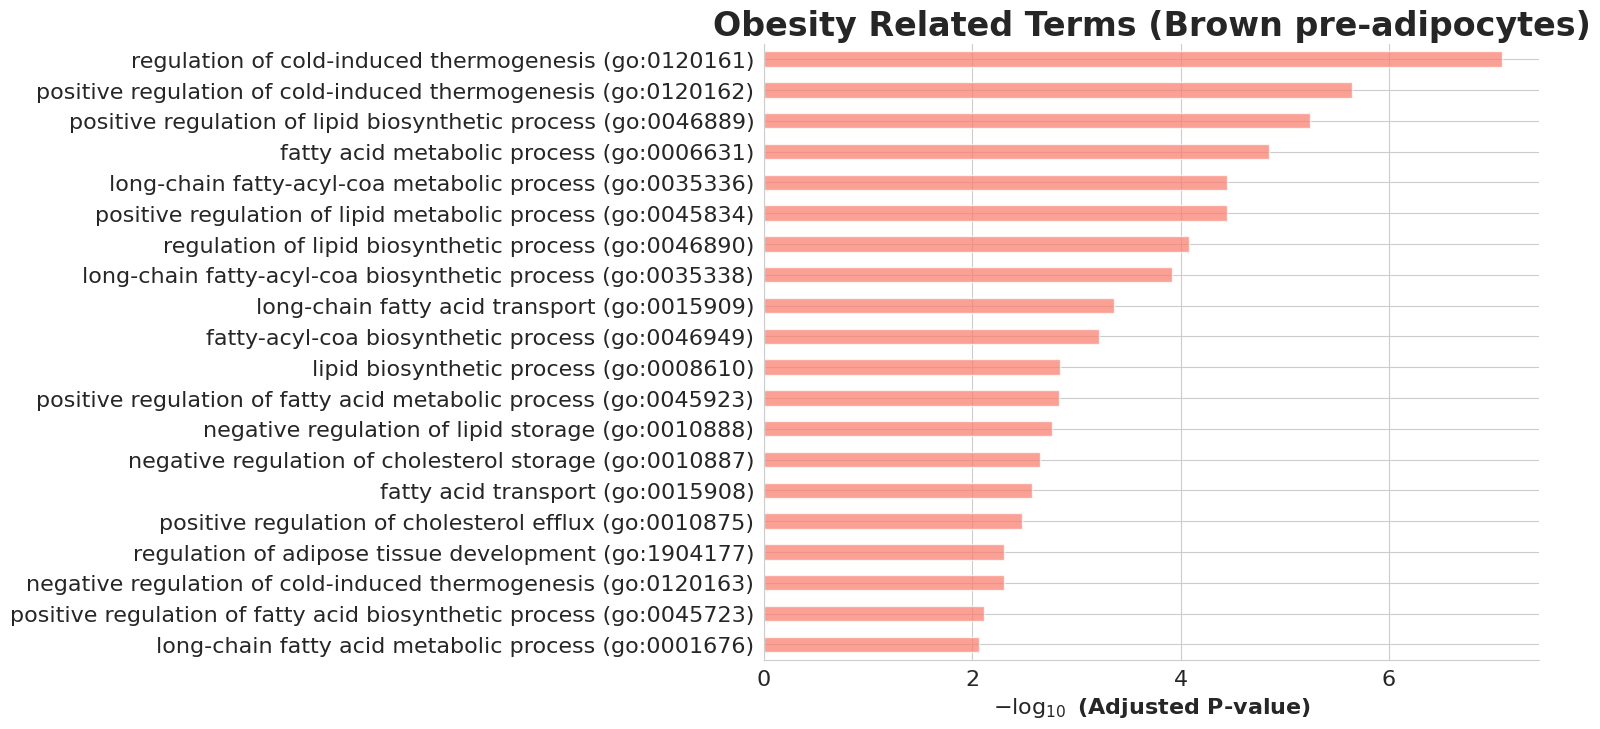

In [87]:
from gseapy import barplot, dotplot

obesity_related_terms = ["lipid", "fatty", "fat", "cholesterol", "adipose", "obesity", "thermo", "fat cell"]
brown_pady_obesity_related_enrichr = brown_padyp_irx3_enrichr_df[brown_padyp_irx3_enrichr_df.Term.str.contains("|".join
                                                                                              (obesity_related_terms))]
barplot(brown_pady_obesity_related_enrichr, title="Obesity Related Terms (Brown pre-adipocytes)", cutoff=0.05, 
        top_term=20, figsize=(10, 8))

CellxGene

In [ ]:
import cellxgene_census